# EDA and Feature Engineering

## Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import warnings 
from scipy.stats import kstest
from sklearn.preprocessing import StandardScaler
import json
import os

warnings.filterwarnings('ignore')
sns.set_palette('Blues_r')

## Load Datasets

In [2]:
daily_data = pd.read_csv('./Data/daily_data.csv')
daily_data.drop('Unnamed: 0',axis=1,inplace=True)
daily_data['order_date'] = pd.DatetimeIndex(daily_data['order_date'])
daily_data.head(5)

,fsn_id,order_date,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,order_payment_type,sla,cust_id,product_mrp,product_procurement_sla,Occassion,Holiday_Week,SaleDay,product_analytic_category,product_analytic_sub_category,product_analytic_vertical
0,ACCCX3S58G7B5F6P,2023-10-17 15:11:54,3.419301e+15,3.419301e+15,6400.0,1,0,0,COD,5,-1.01299130778588E+018,7190,0,NoHoliday,0,True,CameraAccessory,CameraAccessory,CameraTripod
1,ACCCX3S58G7B5F6P,2023-10-19 10:07:22,1.420831e+15,1.420831e+15,6900.0,1,0,0,COD,7,-8.99032457905512E+018,7190,0,NoHoliday,0,False,CameraAccessory,CameraAccessory,CameraTripod
2,ACCCX3S5AHMF55FV,2023-10-20 15:45:56,2.421913e+15,2.421913e+15,1990.0,1,0,0,COD,10,-1.0404429420466E+018,2099,3,NoHoliday,0,False,CameraAccessory,CameraAccessory,CameraTripod
3,ACCCX3S5AHMF55FV,2023-10-14 12:05:15,4.416592e+15,4.416592e+15,1690.0,1,0,0,Prepaid,4,-7.60496084352714E+018,2099,3,NoHoliday,1,False,CameraAccessory,CameraAccessory,CameraTripod
4,ACCCX3S5AHMF55FV,2023-10-17 21:25:03,4.419525e+15,4.419525e+15,1618.0,1,0,0,Prepaid,6,2.8945572083453E+018,2099,3,NoHoliday,0,True,CameraAccessory,CameraAccessory,CameraTripod


In [3]:
monthly_data = pd.read_csv('./Data/monthly_dataset.csv')
monthly_data.drop('SaleDay',axis=1,inplace=True)
monthly_data.rename({'Unnamed: 0':'Date'},axis=1,inplace=True)
monthly_data.head(5)

,Date,gmv,units,product_mrp,deliverybdays,deliverycdays,sla,product_procurement_sla,order_payment_type_COD,order_payment_type_Prepaid,...,Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),NPS,Stock Index
0,2023-07-31,1.742068e+08,90938.0,292616882.0,0.003394,0.003608,6.181534,4.344711,64452.0,24231.0,...,14.478261,20.452174,1.713043,4.165217,1.321739,0.0,1.321739,0.000000,54.599588,1177.0
1,2023-08-31,4.160960e+05,275.0,656716.0,0.018450,0.022140,5.682657,2.678967,200.0,71.0,...,15.277778,20.200000,1.872222,4.072222,2.933333,0.0,2.933333,2.444444,59.987101,1206.0
2,2023-09-30,4.217607e+08,214008.0,686560184.0,0.001138,0.001310,5.745160,6.218172,159591.0,49611.0,...,11.733333,16.286667,3.746667,2.033333,2.660000,0.0,2.660000,0.266667,46.925419,1101.0
3,2023-10-31,5.027279e+08,211939.0,920214378.0,0.001201,0.001423,5.599346,3.749480,154625.0,52676.0,...,11.230769,16.176923,3.092308,1.269231,1.523077,0.0,1.523077,0.000000,44.398389,1210.0
4,2023-11-30,3.313870e+08,133345.0,539877141.0,0.000607,0.000722,5.693794,4.558090,102704.0,27499.0,...,5.700000,10.520000,8.053333,0.573333,2.680000,0.8,3.480000,1.800000,47.000000,1233.0


In [4]:
weather_data = pd.read_csv('./Data/weather_combined.csv')
weather_data.drop('Unnamed: 0',axis=1,inplace=True)
weather_data.head(5)

,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
0,19.333333,13.75,17.625,0.375,0.0,1.6,0.0,1.6,0.0
1,12.666667,10.50,13.750,4.250,0.0,0.8,0.0,0.8,0.0
2,6.000000,7.25,9.875,8.125,0.0,0.0,0.0,0.0,0.0
3,8.000000,4.00,6.000,12.000,0.0,0.4,0.0,0.4,0.0
4,28.000000,9.00,18.500,0.000,0.5,0.0,0.0,0.0,0.0


## Creating Features
    Creating the features that are given in the Problem Statement

In [5]:
# For Sale Price 
daily_data = daily_data.drop(daily_data[daily_data['gmv']/daily_data['units'] > daily_data['product_mrp']].index)
daily_data['Sale Price'] = daily_data['gmv'] / daily_data['units']
#Discount%
daily_data['Discount%'] = 100*(daily_data['product_mrp'] - (daily_data['gmv']*daily_data['units']))/daily_data['product_mrp']
#Product Type
daily_data['Product_Type'] = np.where(daily_data['gmv'] > daily_data['gmv'].quantile(0.8), 'Luxury', 'Mass-market')

In [6]:
# Payday Week
daily_data['order_date'] = pd.to_datetime(daily_data['order_date'])

def get_week_start(date):
    return date - pd.Timedelta(days=date.dayofweek)

daily_data['week_start'] = daily_data['order_date'].apply(get_week_start).dt.normalize()

min_date = daily_data['order_date'].min()
max_date = daily_data['order_date'].max()

months = pd.date_range(
    start=pd.Timestamp(year=min_date.year, month=min_date.month, day=1),
    end=max_date,
    freq='MS'
)

paydays = []
for month in months:
    paydays.append(month)
    payday_15 = pd.Timestamp(year=month.year, month=month.month, day=15)
    if payday_15 <= max_date:
        paydays.append(payday_15)

paydays = pd.to_datetime(paydays)

payday_weeks = {get_week_start(payday) for payday in paydays}
payday_weeks = {ts.strftime('%Y-%m-%d') for ts in payday_weeks}

daily_data['Payday_Week'] = daily_data['week_start'].isin(payday_weeks).astype(int)
daily_data.drop('week_start', axis=1,inplace=True)
daily_data.sort_values('order_date').head(5)

,fsn_id,order_date,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,order_payment_type,sla,...,Occassion,Holiday_Week,SaleDay,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,Sale Price,Discount%,Product_Type,Payday_Week
1393051,AUDDGN3Q2GSCBUSX,2023-07-01 00:36:11,165147793.0,209706706.0,305.0,1,0,0,Prepaid,2,...,Canada Day,1,False,EntertainmentSmall,AudioMP3Player,AudioMP3Player,305.0,72.272727,Mass-market,1
1409788,REME4AC4ENQGKWPB,2023-07-01 00:38:19,165148039.0,209707002.0,139.0,1,0,0,Prepaid,2,...,Canada Day,1,False,EntertainmentSmall,TVVideoSmall,RemoteControl,139.0,80.142857,Mass-market,1
1372888,ACCE5FQXQNRRGYNJ,2023-07-01 03:35:02,165165918.0,209727476.0,385.0,1,0,0,Prepaid,10,...,Canada Day,1,False,GamingHardware,GamingAccessory,GamingMouse,385.0,44.921316,Mass-market,1
1409662,REME4AC4ENQGKWPB,2023-07-01 05:30:28,165169356.0,209731373.0,396.0,4,0,0,Prepaid,1,...,Canada Day,1,False,EntertainmentSmall,TVVideoSmall,RemoteControl,99.0,-126.285714,Mass-market,1
1409663,REME4AC4ENQGKWPB,2023-07-01 06:30:36,165171457.0,209733747.0,99.0,1,0,0,Prepaid,1,...,Canada Day,1,False,EntertainmentSmall,TVVideoSmall,RemoteControl,99.0,85.857143,Mass-market,1


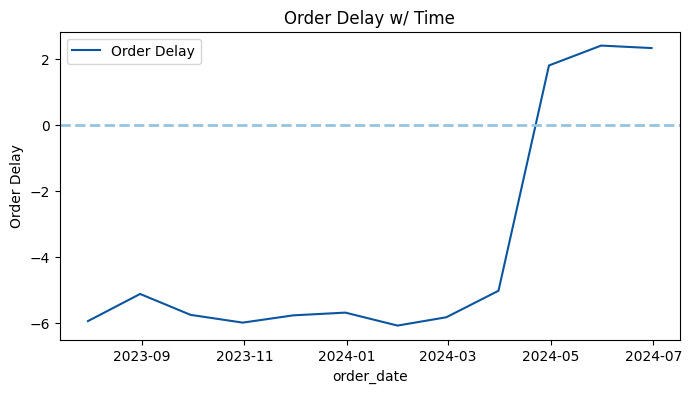

In [7]:
# Order Delay # Order Delay
plt.figure(figsize=(8,4))
daily_data['Order Delay'] = daily_data['deliverycdays'] + daily_data['deliverybdays'] - daily_data['sla']
temp = (daily_data.resample('D',on='order_date')['Order Delay'].mean()).resample('ME').mean()
sns.lineplot(x=temp.index, y = temp,label = 'Order Delay')
pallete = sns.color_palette()
plt.axhline(y=0, linewidth=2, ls='--',color = sns.color_palette("Blues_r",4)[2])
plt.title('Order Delay w/ Time')
plt.show()

## EDA

### Univariate Analysis

In [8]:
print(daily_data.nunique())

fsn_id                             20611
order_date                       1132698
order_id                         1466873
order_item_id                    1447165
gmv                                13675
units                                 27
deliverybdays                        119
deliverycdays                        134
order_payment_type                     2
sla                                   59
cust_id                          1233640
product_mrp                         1878
product_procurement_sla               17
Occassion                             24
Holiday_Week                           2
SaleDay                                2
product_analytic_category              5
product_analytic_sub_category         14
product_analytic_vertical             72
Sale Price                         13273
Discount%                          63945
Product_Type                           2
Payday_Week                            2
Order Delay                          276
dtype: int64


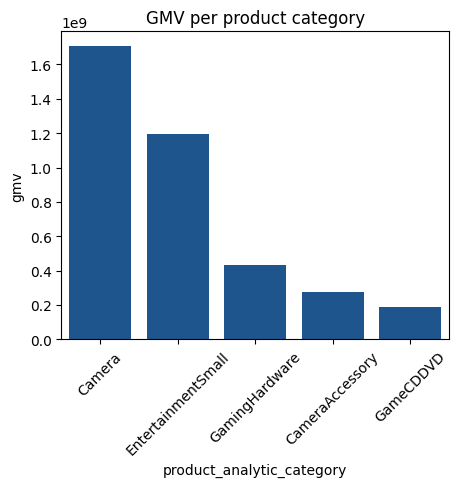

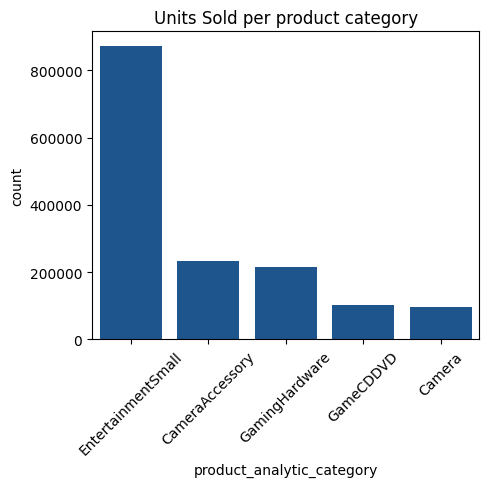

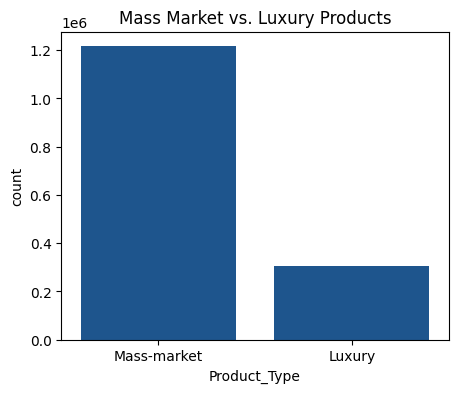

In [9]:
#Product Categories
plt.figure(figsize=(5,4))
sns.barplot(daily_data.groupby('product_analytic_category')['gmv'].sum().sort_values(ascending=False))
plt.title('GMV per product category')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(5,4))
sns.barplot(daily_data['product_analytic_category'].value_counts())
plt.title('Units Sold per product category')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(5,4))
sns.barplot(daily_data['Product_Type'].value_counts())
plt.title('Mass Market vs. Luxury Products')
plt.show()

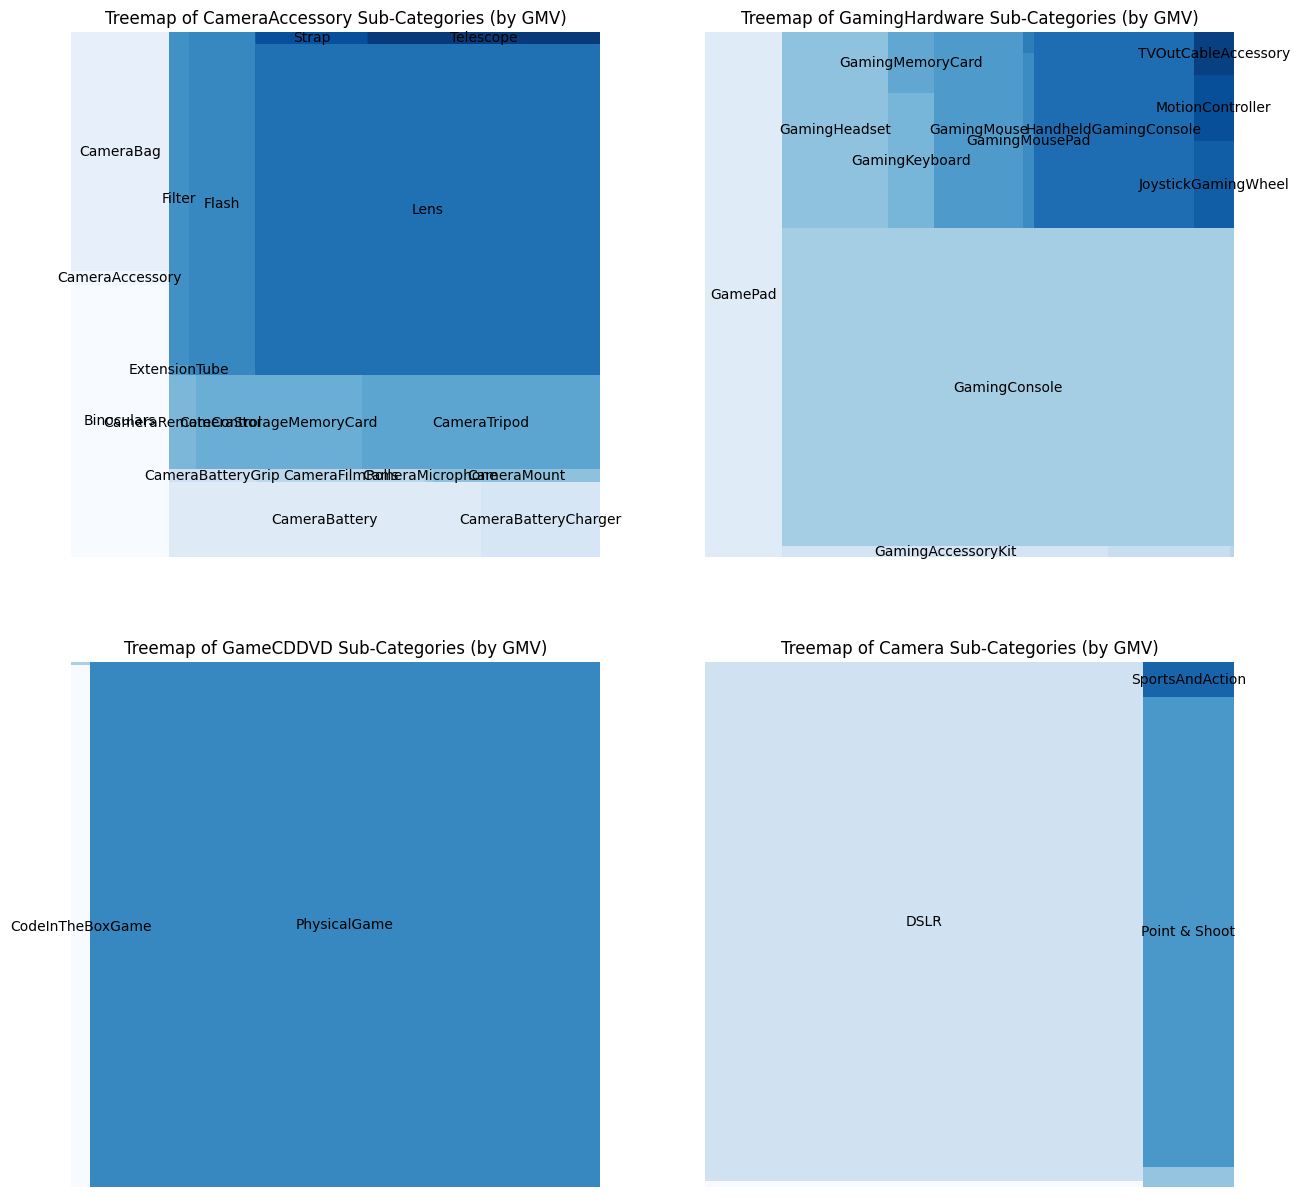

In [10]:
# Visualize the impact of sub_categories
fig, axs = plt.subplots(2,2, figsize=(15, 15))

def Create_Treemap(cat,ax,k):
    df = daily_data[daily_data['product_analytic_category'] == cat]
    sub_category_gmv = df.groupby('product_analytic_vertical')['gmv'].sum().reset_index()
    sub_category_gmv.columns = ['product_analytic_vertical', 'gmv_sum']

    # Create labels with sub_category and gmv_sum, but only for larger boxes
    labels = [f"{sub_category}" if gmv > np.percentile(sub_category_gmv['gmv_sum'], k) else ""
            for sub_category, gmv in zip(sub_category_gmv['product_analytic_vertical'], sub_category_gmv['gmv_sum'])]
    
    cmap = plt.cm.get_cmap('Blues')
    colors = [cmap(i / len(sub_category_gmv)) for i in range(len(sub_category_gmv))]

    # Plot the treemap
    squarify.plot(sizes=sub_category_gmv['gmv_sum'], label=labels, alpha=1, color=colors, text_kwargs={'fontsize':10},ax=ax)  # Adjust fontsize if needed
    ax.set_title(f'Treemap of {cat} Sub-Categories (by GMV)')
    ax.axis('off')

axs = axs.flatten()
k = 0
for cat in daily_data['product_analytic_category'].unique():
        if cat != 'EntertainmentSmall':
                Create_Treemap(cat,axs[k],25)
                k+=1

plt.show()

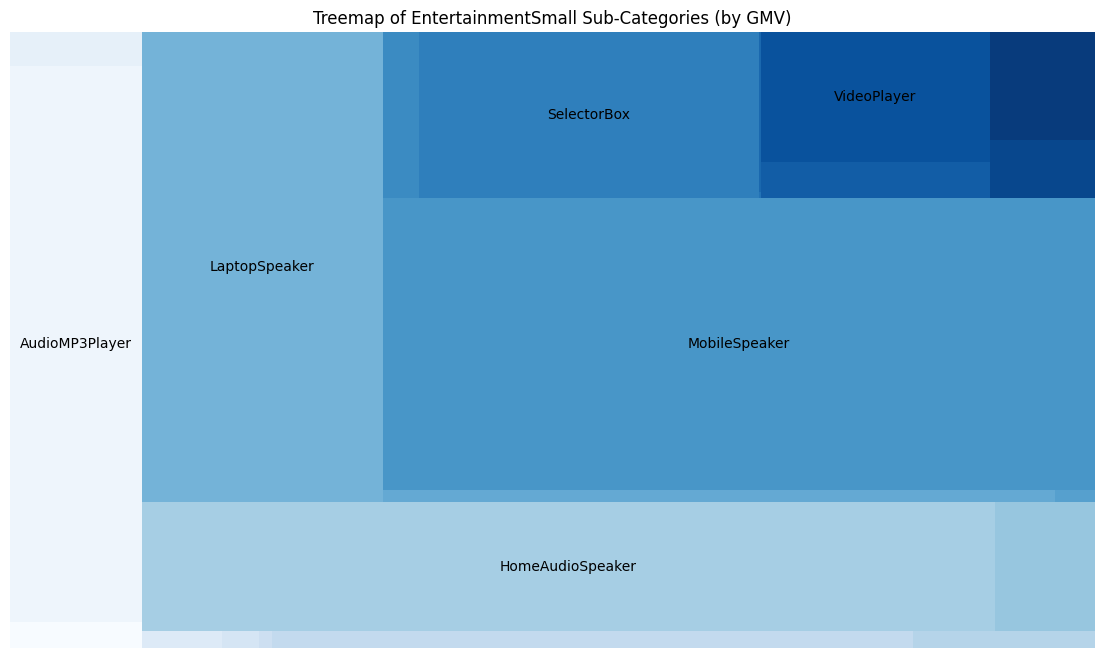

In [11]:
fig, axs = plt.subplots(figsize=(14, 8))
Create_Treemap('EntertainmentSmall',axs,75)

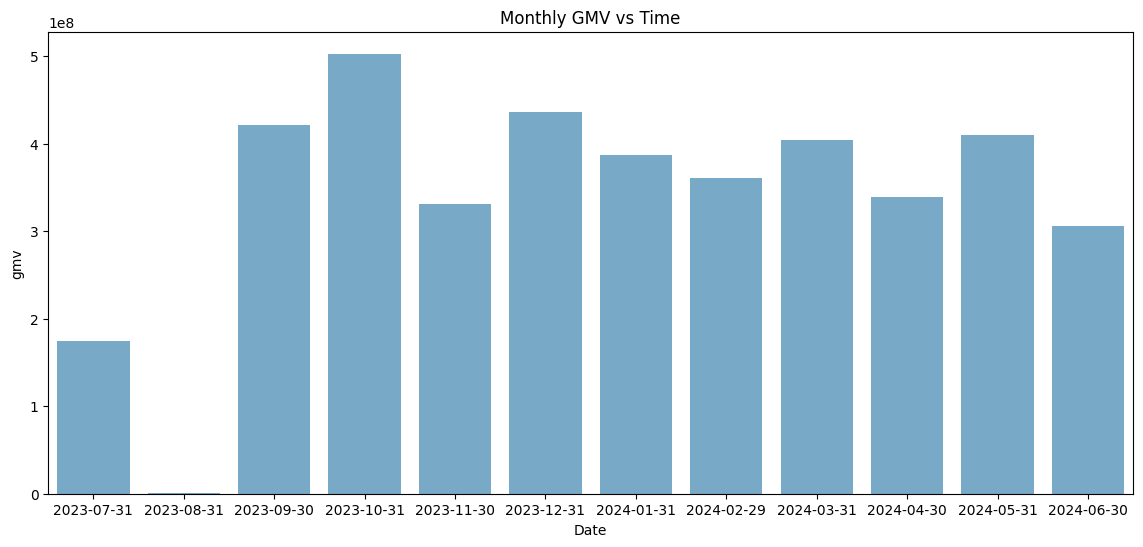

In [12]:
# Monthly GMV over time 
plt.figure(figsize=(14,6))
sns.barplot(monthly_data,x = 'Date',y = 'gmv',color=sns.color_palette("Blues",7)[3])
plt.title('Monthly GMV vs Time')
plt.show()

### Distribution Analysis

In [13]:
monthly_data.columns

Index(['Date', 'gmv', 'units', 'product_mrp', 'deliverybdays', 'deliverycdays',
       'sla', 'product_procurement_sla', 'order_payment_type_COD',
       'order_payment_type_Prepaid', 'product_analytic_category_Camera',
       'product_analytic_category_CameraAccessory',
       'product_analytic_category_EntertainmentSmall',
       'product_analytic_category_GameCDDVD',
       'product_analytic_category_GamingHardware', 'Total Investment', 'TV',
       'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing',
       ' Affiliates', 'SEM', 'Radio', 'Other', 'Max Temp (°C)',
       'Min Temp (°C)', 'Mean Temp (°C)', 'Heat Deg Days (°C)',
       'Cool Deg Days (°C)', 'Total Rain (mm)', 'Total Snow (cm)',
       'Total Precip (mm)', 'Snow on Grnd (cm)', 'NPS', 'Stock Index'],
      dtype='object')

In [14]:
cols = ['gmv', 'units', 'product_mrp','sla', 'product_procurement_sla', 'order_payment_type_COD','NPS']

# Kolmogorov-Smirnov Test (against normal distribution)
def check_normality(data, column):
    print(f"\nChecking Normality for {column}:")
    ks_stat, ks_p = kstest(data, 'norm', args=(np.mean(data), np.std(data)))
    print(f"Kolmogorov-Smirnov Test: Statistic={ks_stat:.3f}, p-value={ks_p:.3f}")
    print('='*60)
    
for col in cols:
    check_normality(monthly_data[col].dropna(),col)


Checking Normality for gmv:
Kolmogorov-Smirnov Test: Statistic=0.230, p-value=0.478

Checking Normality for units:
Kolmogorov-Smirnov Test: Statistic=0.207, p-value=0.612

Checking Normality for product_mrp:
Kolmogorov-Smirnov Test: Statistic=0.200, p-value=0.654

Checking Normality for sla:
Kolmogorov-Smirnov Test: Statistic=0.180, p-value=0.772

Checking Normality for product_procurement_sla:
Kolmogorov-Smirnov Test: Statistic=0.254, p-value=0.358

Checking Normality for order_payment_type_COD:
Kolmogorov-Smirnov Test: Statistic=0.214, p-value=0.570

Checking Normality for NPS:
Kolmogorov-Smirnov Test: Statistic=0.207, p-value=0.611


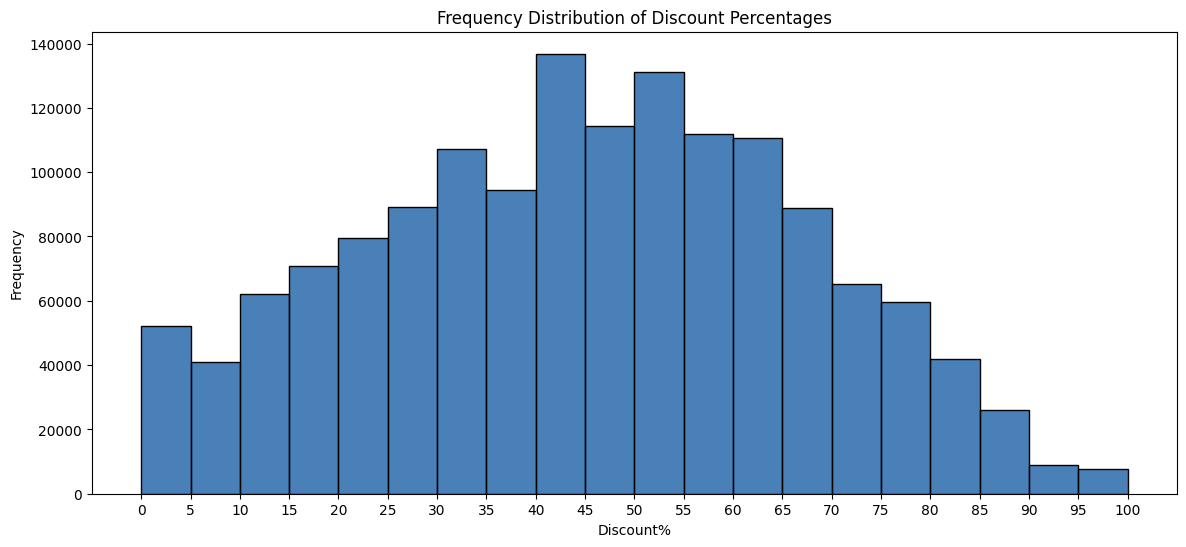

In [15]:
# Frequency Plot of Discount%
plt.figure(figsize=(14,6))
sns.histplot(data=daily_data, x='Discount%', bins=range(0, 101, 5))
plt.title('Frequency Distribution of Discount Percentages')
plt.xlabel('Discount%')
plt.ylabel('Frequency')
plt.xticks(range(0, 101, 5))
plt.show()


### Bivariate Analysis

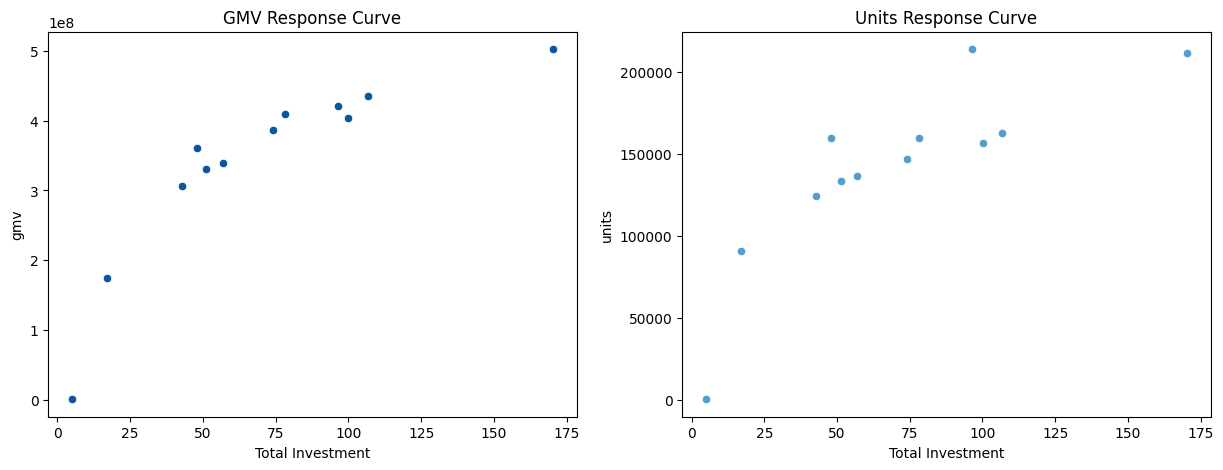

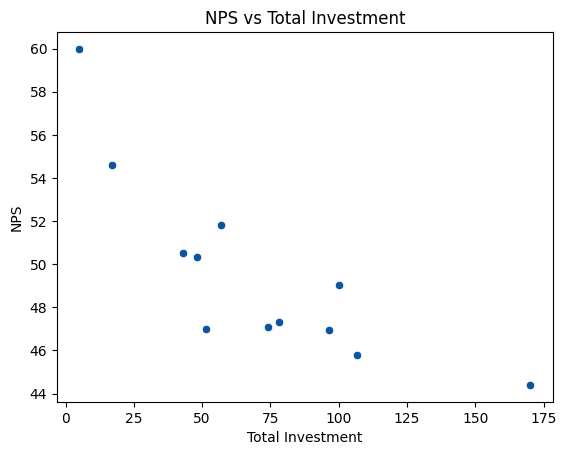

In [16]:
fig,axs  = plt.subplots(1,2,figsize=(15,5))
axs = axs.flatten()

# GMV vs Total Investment
sns.scatterplot(x = monthly_data['Total Investment'],y = monthly_data['gmv'],ax=axs[0])
axs[0].set_title('GMV Response Curve')

# Units vs Total Investment
sns.scatterplot(x = monthly_data['Total Investment'],y = monthly_data['units'],ax = axs[1],color = sns.color_palette("Blues_r",6)[2])
axs[1].set_title('Units Response Curve')
plt.show()

# NPS vs Total Investment
sns.scatterplot(x = monthly_data['Total Investment'],y = monthly_data['NPS'])
plt.title('NPS vs Total Investment')
plt.show()

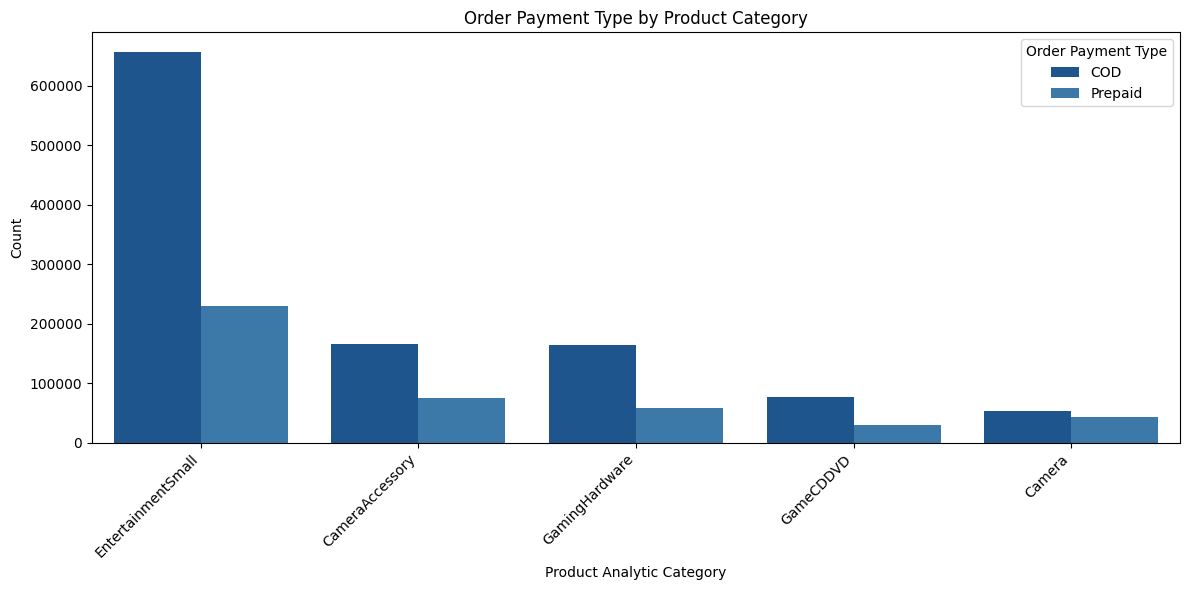

In [17]:
# Group by category and payment type, summing the units
df_filtered = daily_data[["product_analytic_category", "order_payment_type", "units"]]
df_filtered.value_name = 'count'
category_payment_units = df_filtered.groupby(["product_analytic_category", "order_payment_type"])["units"].sum().unstack()
category_payment_units.reset_index(inplace=True)
category_payment_units.columns.name = None
df_melted = category_payment_units.melt(id_vars=['product_analytic_category'], 
                    var_name='order_payment_type', 
                    value_name='count')

# Calculate total count for each category and sort
df_totals = df_melted.groupby('product_analytic_category')['count'].sum().reset_index()
df_totals = df_totals.sort_values(by='count', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='product_analytic_category', y='count', hue='order_payment_type', 
            data=df_melted, order=df_totals['product_analytic_category'])
plt.title('Order Payment Type by Product Category')
plt.xlabel('Product Analytic Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Order Payment Type')
plt.tight_layout()
plt.show()

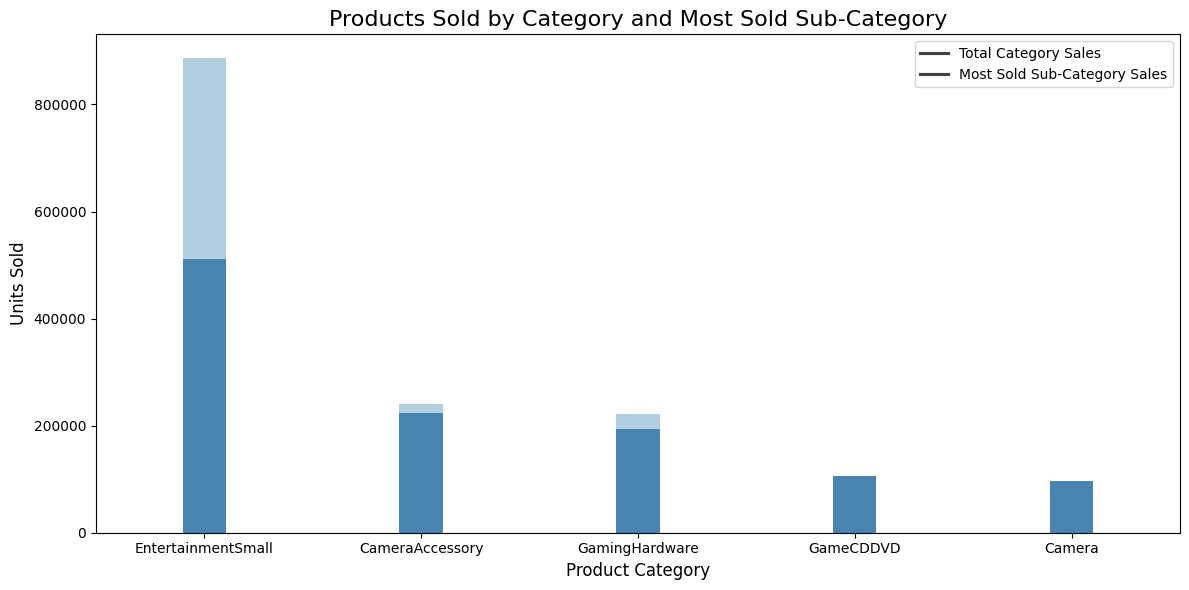

In [18]:
# Group, aggregate, and find most sold sub-categories
category_sub_category_counts = daily_data.groupby(['product_analytic_category', 'product_analytic_sub_category'])['units'].sum().reset_index()
most_sold_sub_categories = category_sub_category_counts.loc[category_sub_category_counts.groupby('product_analytic_category')['units'].idxmax()]
most_sold_sub_categories = most_sold_sub_categories.rename(columns={'units': 'sub_category_count'})

# Calculate category totals and merge
category_totals = daily_data.groupby('product_analytic_category')['units'].sum().reset_index()
category_totals = category_totals.rename(columns={'units': 'category_total_count'})
most_sold_sub_categories = pd.merge(most_sold_sub_categories, category_totals, on='product_analytic_category')
most_sold_sub_categories['percentage'] = (most_sold_sub_categories['sub_category_count'] / most_sold_sub_categories['category_total_count']) * 100

category_totals = category_totals.sort_values(by=['category_total_count'], ascending=False)
sorted_categories = category_totals['product_analytic_category'].tolist()


plt.figure(figsize=(12, 6))
palette = sns.color_palette('Blues_r', n_colors=2)
sns.barplot(x='product_analytic_category', y='category_total_count', data=category_totals, color=palette[1], width=0.2, order=sorted_categories)
sns.barplot(x='product_analytic_category', y='sub_category_count', data=most_sold_sub_categories, color=palette[0], width=0.2, order=sorted_categories)

plt.title('Products Sold by Category and Most Sold Sub-Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Units Sold', fontsize=12)
plt.legend(labels=['Total Category Sales', 'Most Sold Sub-Category Sales'], fontsize=10)

plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

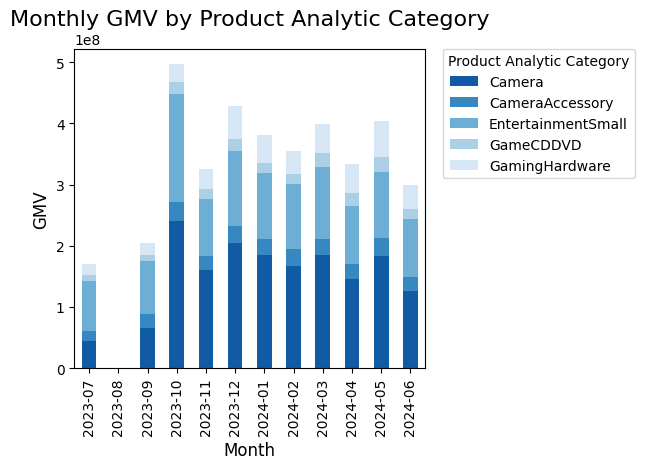

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Group data by month and product_analytic_category and calculate total GMV
monthly_gmv_by_category = daily_data.groupby([pd.Grouper(key='order_date', freq='M'), 'product_analytic_category'])['gmv'].sum().reset_index()

# 2. Pivot the data to have product_analytic_category as columns
monthly_gmv_pivot = monthly_gmv_by_category.pivot(index='order_date', columns='product_analytic_category', values='gmv').fillna(0)

# 3. Create the stacked bar plot
plt.figure(figsize=(12, 8))
ax = monthly_gmv_pivot.plot(kind='bar', stacked=True, color=sns.color_palette("Blues_r", n_colors=len(monthly_gmv_pivot.columns)))

# 4. Customize the plot
plt.title('Monthly GMV by Product Analytic Category', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('GMV', fontsize=12)

# **Format x-axis labels to show only month and year:**
ax.set_xticklabels([pd.to_datetime(x).strftime('%Y-%m') for x in monthly_gmv_pivot.index], fontsize=10)  


# Adjust legend properties
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, title='Product Analytic Category', fontsize=10, 
           bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.) 

plt.grid(False)

plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

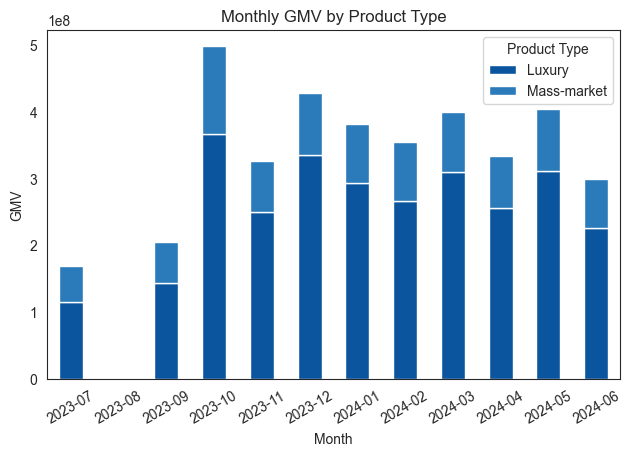

In [20]:
# GMV by Product Type vs Date
daily_data['order_date'] = pd.to_datetime(daily_data['order_date'])
daily_data['month'] = daily_data['order_date'].dt.to_period('M')

ma = daily_data.groupby(['month', 'Product_Type'])['gmv'].sum().unstack()

sns.set_style('white')
plt.figure(figsize=(12, 6))
ax = ma.plot(kind='bar', stacked=True)
plt.title('Monthly GMV by Product Type')
plt.xlabel('Month')
plt.ylabel('GMV')
plt.legend(title='Product Type')
plt.tight_layout()
plt.xticks(rotation=30)
plt.show()

### Heatmaps

In [21]:
monthly_data.columns

Index(['Date', 'gmv', 'units', 'product_mrp', 'deliverybdays', 'deliverycdays',
       'sla', 'product_procurement_sla', 'order_payment_type_COD',
       'order_payment_type_Prepaid', 'product_analytic_category_Camera',
       'product_analytic_category_CameraAccessory',
       'product_analytic_category_EntertainmentSmall',
       'product_analytic_category_GameCDDVD',
       'product_analytic_category_GamingHardware', 'Total Investment', 'TV',
       'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing',
       ' Affiliates', 'SEM', 'Radio', 'Other', 'Max Temp (°C)',
       'Min Temp (°C)', 'Mean Temp (°C)', 'Heat Deg Days (°C)',
       'Cool Deg Days (°C)', 'Total Rain (mm)', 'Total Snow (cm)',
       'Total Precip (mm)', 'Snow on Grnd (cm)', 'NPS', 'Stock Index'],
      dtype='object')

In [22]:
num_cols = ['gmv', 'units', 'product_mrp', 'deliverybdays', 'deliverycdays', 
            'sla', 'product_procurement_sla', 'order_payment_type_COD',
       'order_payment_type_Prepaid', 'product_analytic_category_Camera',
       'product_analytic_category_CameraAccessory',
       'product_analytic_category_EntertainmentSmall',
       'product_analytic_category_GameCDDVD',
       'product_analytic_category_GamingHardware','Min Temp (°C)', 'Mean Temp (°C)',
       'Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Rain (mm)',
       'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)']
for i in num_cols:
    print('Correlation of',i,monthly_data[i].corr(monthly_data['Total Investment']))

Correlation of gmv 0.8539835548340746
Correlation of units 0.8200057597007491
Correlation of product_mrp 0.8936723020829473
Correlation of deliverybdays -0.14833197941260767
Correlation of deliverycdays -0.14881038062258256
Correlation of sla -0.3046544558394095
Correlation of product_procurement_sla -0.04336113102422074
Correlation of order_payment_type_COD 0.740893680304459
Correlation of order_payment_type_Prepaid 0.37513835898309633
Correlation of product_analytic_category_Camera 0.914195376098554
Correlation of product_analytic_category_CameraAccessory 0.6250535589768247
Correlation of product_analytic_category_EntertainmentSmall 0.847832146701966
Correlation of product_analytic_category_GameCDDVD 0.6445358671276822
Correlation of product_analytic_category_GamingHardware 0.6873200455168604
Correlation of Min Temp (°C) -0.21911758830030698
Correlation of Mean Temp (°C) -0.2627382588005157
Correlation of Heat Deg Days (°C) 0.14817373081005505
Correlation of Cool Deg Days (°C) -0.499

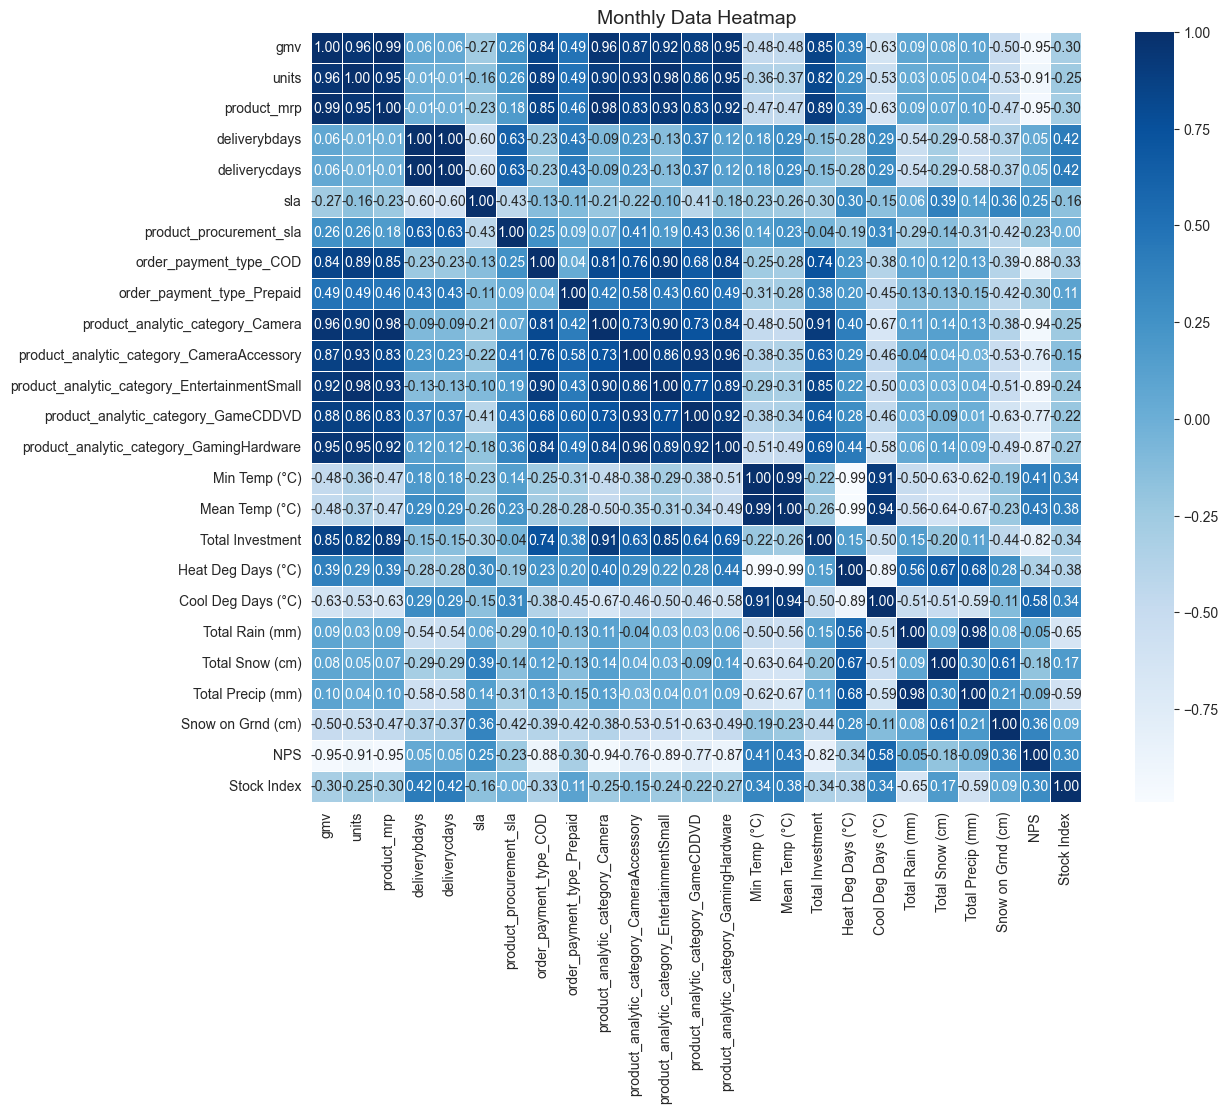

In [23]:
selected_features = [
    'gmv', 'units', 'product_mrp', 'deliverybdays', 'deliverycdays',
    'sla', 'product_procurement_sla', 'order_payment_type_COD',
    'order_payment_type_Prepaid', 'product_analytic_category_Camera',
    'product_analytic_category_CameraAccessory',
    'product_analytic_category_EntertainmentSmall',
    'product_analytic_category_GameCDDVD', 'product_analytic_category_GamingHardware',
    'Min Temp (°C)', 'Mean Temp (°C)', 'Total Investment',
    'Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Rain (mm)',
    'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)',
    'NPS', 'Stock Index',]

corr_matrix = monthly_data[selected_features].corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=0.5, square=True,cmap = "Blues")
plt.title("Monthly Data Heatmap", fontsize=14)
plt.show()

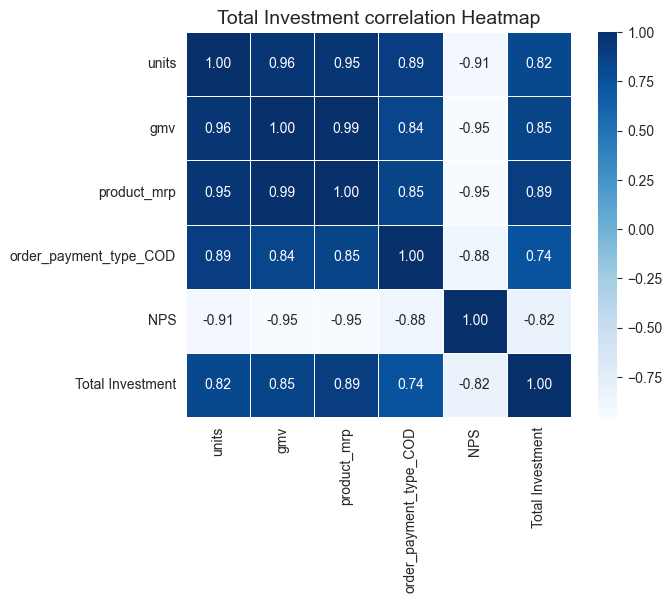

In [24]:
high_corr=['units','gmv','product_mrp','order_payment_type_COD','NPS','Total Investment']

corr_matrix = monthly_data[high_corr].corr()
plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=0.5, square=True,cmap="Blues")
plt.title("Total Investment correlation Heatmap", fontsize=14)
plt.show()

## KPI Creation
### KRAs:
1. GMV
2. Units
### KPIs:
1. MROI (Marketing ROI)
2. DPI
3. SDPI
4. MSG
5. SPT

### KRIs
1. NPS
2. OrderDelay
3. CPA

<Axes: xlabel='DPI', ylabel='Density'>

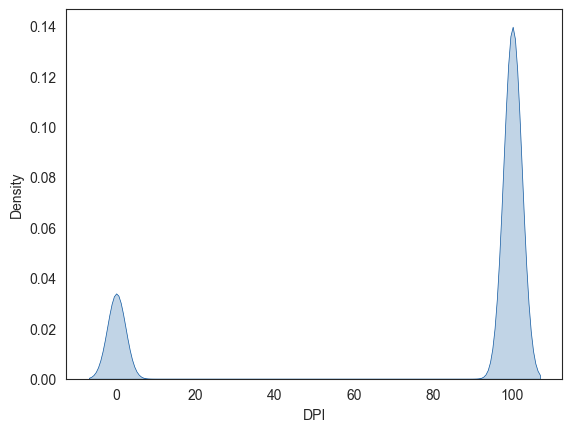

In [25]:
# Calculate MROI
monthly_data['MROI'] = ((monthly_data['gmv'].diff().bfill() - monthly_data['Total Investment']) / 
                         monthly_data['Total Investment']) * 100
# Compute DPI
daily_data['Orders_within_SLA'] = (daily_data['deliverycdays'] + daily_data['deliverybdays'] <= daily_data['sla']) * daily_data['units']
daily_data['DPI'] = (daily_data['Orders_within_SLA'] / daily_data['units']) * 100

sns.kdeplot(daily_data,x="DPI",linewidth=.5,fill=True)

In [26]:
daily_data.resample('D',on='order_date')["order_date"].count().index

DatetimeIndex(['2023-07-01', '2023-07-02', '2023-07-03', '2023-07-04',
               '2023-07-05', '2023-07-06', '2023-07-07', '2023-07-08',
               '2023-07-09', '2023-07-10',
               ...
               '2024-06-21', '2024-06-22', '2024-06-23', '2024-06-24',
               '2024-06-25', '2024-06-26', '2024-06-27', '2024-06-28',
               '2024-06-29', '2024-06-30'],
              dtype='datetime64[ns]', name='order_date', length=366, freq='D')

In [27]:
# MSG
monthly_data['msg'] = monthly_data['gmv'].diff()/monthly_data['gmv'].shift(1)
monthly_data['msg'] = monthly_data['msg'].fillna(0)

# SPT 
monthly_data['gmv_cod'] = daily_data[daily_data['order_payment_type'] == 'COD'].resample('ME',on='order_date')['gmv'].sum().values
monthly_data['gmv_prepaid'] = daily_data[daily_data['order_payment_type'] == 'Prepaid'].resample('ME',on='order_date')['gmv'].sum().values

monthly_data['spt_cod'] = monthly_data['gmv_cod'].div(monthly_data['gmv'])
monthly_data['spt_prepaid'] = monthly_data['gmv_prepaid'].div(monthly_data['gmv'])

In [28]:
# CPA
orders = daily_data.copy()
orders = orders.sort_values(by=['cust_id','order_date'])

# Get first purchase date for each customer
first_purchase = orders.groupby('cust_id')['order_date'].min().reset_index()
first_purchase.columns = ['cust_id', 'First Purchase Date']
first_purchase['First Purchase Date'] = pd.DatetimeIndex(first_purchase['First Purchase Date'])

first_purchase['Month'] = first_purchase['First Purchase Date'].dt.to_period('M')

# Count the number of new customers for each month
monthly_new_customers = first_purchase.groupby('Month').size().reset_index(name='New_Customers')

In [29]:
media_spend = pd.DataFrame(monthly_data['Total Investment'])
media_spend.index = pd.DatetimeIndex(monthly_data['Date'])
media_spend['Month'] = media_spend.index.to_period('M')
monthly_media_spend = media_spend.groupby('Month')['Total Investment'].sum().reset_index()

# Merge the two monthly datasets on 'Month'
monthly_cpa_df = pd.merge(monthly_new_customers, monthly_media_spend, on='Month', how='inner')

# Calculate monthly Cost Per Acquisition (CPA)
monthly_cpa_df['CPA'] = (10**8)*monthly_cpa_df['Total Investment'] / monthly_cpa_df['New_Customers'] 
monthly_data['CPA'] = monthly_cpa_df['CPA']

## Exports to dashboard

In [30]:
daily_data.columns

Index(['fsn_id', 'order_date', 'order_id', 'order_item_id', 'gmv', 'units',
       'deliverybdays', 'deliverycdays', 'order_payment_type', 'sla',
       'cust_id', 'product_mrp', 'product_procurement_sla', 'Occassion',
       'Holiday_Week', 'SaleDay', 'product_analytic_category',
       'product_analytic_sub_category', 'product_analytic_vertical',
       'Sale Price', 'Discount%', 'Product_Type', 'Payday_Week', 'Order Delay',
       'month', 'Orders_within_SLA', 'DPI'],
      dtype='object')

In [31]:
# category_revenue 
revenue = pd.DataFrame()
revenue['Total_Revenue'] = daily_data.groupby('product_analytic_category')['gmv'].sum()
revenue['Total_Units'] = daily_data.groupby('product_analytic_category')['units'].sum()
revenue['Total_Orders'] = daily_data.groupby('product_analytic_category')['order_id'].count()
revenue['Avg_Discount'] = daily_data.groupby('product_analytic_category')['Discount%'].mean()
revenue['Revenue_per_Order'] = revenue['Total_Revenue']/revenue['Total_Orders']
revenue['Revenue_Percentage'] = 100*revenue['Total_Revenue']/ np.sum(revenue['Total_Revenue'])
revenue['product_analytic_category'] = revenue.index

# 

In [35]:
###########
file_path = "./electromart-dashboard copy/electromart-dashboard copy/src/components/src/data/category_revenue.json"
json_result = revenue.to_json(orient='records')
category_revenue = json.dumps(json.loads(json_result), indent=2)
with open(file_path, 'w') as f:
    json.dump(json.loads(json_result), f, indent=2)

print(f"JSON file saved to: {file_path}")

JSON file saved to: ./electromart-dashboard copy/electromart-dashboard copy/src/components/src/data/category_revenue.json
